In [ ]:
pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### Ashwini's code ###
#  Get the files from the google drive
!gdown --id 1-u8607N4SsbDsdJ7GLw6F_fEp7tVNo2q  #file on the Google Drive

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-u8607N4SsbDsdJ7GLw6F_fEp7tVNo2q
To: /content/training.1600000.processed.noemoticon.csv
100% 239M/239M [00:02<00:00, 105MB/s] 


In [ ]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import seaborn as sns
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
### Ashwini's code ###
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = 'latin',header=None)
data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
### Ashwini's code ###
data.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
data.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
### Ashwini's code ###
from nltk.corpus import stopwords
nltk.download("stopwords")
stopword=stopwords.words('english')
print(len(stopword))
stopword=set(stopword)
len(stopword)
stemmer=nltk.SnowballStemmer('english')

179


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
### Ashwini's code ###
data.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
### Ashwini's code ###
data.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
data = data.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [ ]:
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
### Ashwini's code ###
def remove_stopwords(text, stem=False):
    text=str(text).lower()  #lower_case
    tokens = []
    for token in text.split():
        if token not in stopword:
          if stemmer:
            tokens.append(stemmer.stem(token))
          else:
            tokens.append(token)
    return " ".join(tokens)


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_mentions(text):
    mention = re.compile(r'@\w*')
    return mention.sub(r'',text)

def remove_numbers(text):
    numbers = re.compile(r'\d')
    return numbers.sub(r'',text)

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"                   
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)



def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions
data['clear_text'] = data['text'].apply(lambda x: remove_stopwords(x))
data['clear_text'] = data['clear_text'].apply(lambda x: remove_URL(x))
data['clear_text'] = data['clear_text'].apply(lambda x: remove_mentions(x))
data['clear_text'] = data['clear_text'].apply(lambda x: remove_numbers(x))
data['clear_text'] = data['clear_text'].apply(lambda x: remove_emojis(x))
data['clear_text'] = data['clear_text'].apply(lambda x: remove_html(x))
data['clear_text'] = data['clear_text'].apply(lambda x: remove_punct(x))

In [ ]:
data.head()

,sentiment,text,clear_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda got david carr thi...
1,0,is upset that he can't update his Facebook by ...,upset cant updat facebook text it might cri re...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",no behav all im mad here cant see there


In [ ]:
### Bharadwaj's code ###
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
data.sentiment = data.sentiment.apply(lambda x: label_decoder(x))
data.head()

,sentiment,text,clear_text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda got david carr thi...
1,Negative,is upset that he can't update his Facebook by ...,upset cant updat facebook text it might cri re...
2,Negative,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,Negative,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,Negative,"@nationwideclass no, it's not behaving at all....",no behav all im mad here cant see there


Text(0.5, 1.0, 'Sentiment Data Distribution')

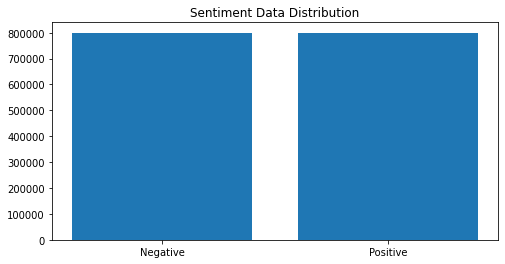

In [ ]:
### Bharadwaj's code ###
val_count = data.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
### Bharadwaj's code ###
data=data.iloc[(np.random.choice(np.arange(len(data)),250000, False))]

In [ ]:
data

,sentiment,text,clear_text
687798,Negative,There aren't many things sadder than seeing th...,mani thing sadder see hous live year empti
1398234,Positive,@beckie0 haha 'q and a' is always fun Im 18 ....,haha q a alway fun im half hehe yay think a...
610522,Negative,Summer school equals but also $$$.,summer school equal also
1598392,Positive,@violahou did you buy the jonas brothers new a...,buy jona brother new album
1055724,Positive,#followfriday - @blueberrio - awesome twitter ...,followfriday awesom twitter conversationalist
...,...,...,...
719878,Negative,"1 more hour at the Lake, 5 hours of sleep, wor...",hour lake hour sleep work lake ap work offsp...
103963,Negative,"Unless I start studying harder, this is lookin...",unless start studi harder look like b quartern...
1471172,Positive,Bob ure so funny,bob ure funni
901164,Positive,"@adawada A towel, a &quot;Sub-Etha Sens-O-Mati...",towel subetha sensomatic guid


Text(0.5, 1.0, 'Sentiment Data Distribution')

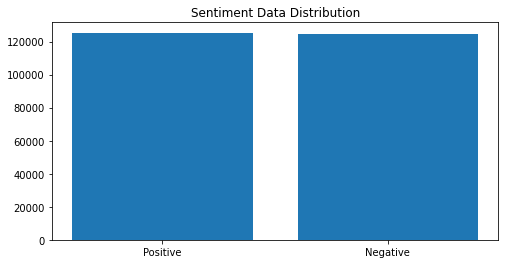

In [ ]:
### Bharadwaj's code ###
val_count = data.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
### Ashwini's code ###
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30
train_data, test_data = train_test_split(data, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index)
print("Vocabulary Size :", vocab_size)
#print(word_index)

Train Data size: 200000
Test Data size 50000
Vocabulary Size : 162140


In [ ]:
### Bharadwaj's code  ###
!pip install "pad-sequences"
from keras_preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Training X Shape: (200000, 30)
Testing X Shape: (50000, 30)


In [ ]:
### Bharadwaj's code and Ashwini's code ###
labels = train_data.sentiment.unique().tolist()

encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (200000, 1)
y_test shape: (50000, 1)


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
### Bharadwaj's code ###
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "everyon went hospit flu", 
    "dagestan arent afraid direct","hi"]
)

<tf.Tensor: shape=(3, 768), dtype=float32, numpy=
array([[-0.21699785,  0.21534227,  0.99384046, ...,  0.93904954,
        -0.12864089,  0.4638286 ],
       [-0.85028374, -0.3933899 , -0.6908908 , ..., -0.2888842 ,
        -0.54167235,  0.9002638 ],
       [-0.785335  , -0.11467484,  0.61448115, ...,  0.57223976,
        -0.51527226,  0.87288594]], dtype=float32)>

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D


In [ ]:
LR = 1e-3

In [ ]:
### Bharadwaj's code ###
reduce_lr = ReduceLROnPlateau(factor=0.1,
                              min_lr = 0.001,
                              monitor = 'val_loss',
                              patience=1,
                              verbose=1)

In [ ]:
### Bharadwaj's code ###
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))
regressor.add(Dense(1, activation = 'sigmoid'))

# Compiling the RNN
regressor.compile(optimizer='Adam',loss='binary_crossentropy',metrics = ['accuracy'])


In [ ]:
regressor.summary()

In [ ]:
history = regressor.fit(x_train, y_train, batch_size=32, epochs=7,
                    validation_data=(x_test, y_test), callbacks=[reduce_lr])

Epoch 1/7
6250/6250 [==============================] - 230s 36ms/step - loss: 0.6775 - accuracy: 0.5709 - val_loss: 0.6747 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 2/7
6250/6250 [==============================] - 188s 30ms/step - loss: 0.6673 - accuracy: 0.5903 - val_loss: 0.6717 - val_accuracy: 0.5727 - lr: 0.0010
Epoch 3/7
6250/6250 [==============================] - 170s 27ms/step - loss: 0.6608 - accuracy: 0.6002 - val_loss: 0.6681 - val_accuracy: 0.5863 - lr: 0.0010
Epoch 4/7
6250/6250 [==============================] - 167s 27ms/step - loss: 0.6611 - accuracy: 0.5996 - val_loss: 0.6697 - val_accuracy: 0.5836 - lr: 0.0010
Epoch 5/7
6250/6250 [==============================] - 167s 27ms/step - loss: 0.6581 - accuracy: 0.6030 - val_loss: 0.6649 - val_accuracy: 0.5900 - lr: 0.0010
Epoch 6/7
6250/6250 [==============================] - 170s 27ms/step - loss: 0.6550 - accuracy: 0.6079 - val_loss: 0.6672 - val_accuracy: 0.5819 - lr: 0.0010
Epoch 7/7
6250/6250 [=========================

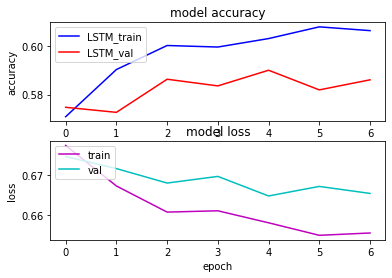

In [ ]:
### Bharadwaj's code ###
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
### Bharadwaj's code ###
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = regressor.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

5/5 [==============================] - 8s 1s/step


In [ ]:
### Bharadwaj's code ###
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

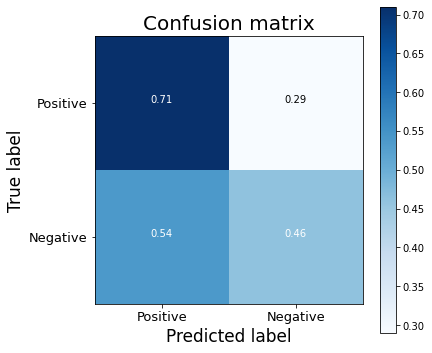

In [ ]:
### Bharadwaj's code ###
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.57      0.71      0.63     24995
    Positive       0.61      0.46      0.53     25005

    accuracy                           0.59     50000
   macro avg       0.59      0.59      0.58     50000
weighted avg       0.59      0.59      0.58     50000



In [ ]:
# SAVE MODEL WEIGHTS
regressor.save_weights(f'sentiment_weights_v1.h5')